# Examen de Advanced Machine Learning - Intento 2

## 1. Exploración y preprocesamiento de datos:
  * Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.
  * Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.

## 2. Análisis no supervisado:
  * Selecciona un enfoque de análisis no supervisado: K-means o PCA.
    * K-means: Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.
    * PCA: Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.

## 3. Modelado con MLP:
  * Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.
  * Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.
  * Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.

## 4. Evaluación del modelo:
  * Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.
  * Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

## 5. Discusión y análisis:
  * Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?
  * Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?

## 6. Entrega final:
  * Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones. Asegúrate de que el informe sea claro y estructurado, con visualizaciones que apoyen tu análisis.

In [192]:
# Librerias a utilizar
import os
import pandas as pd
import numpy as np
from datetime import datetime
import json
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway,pearsonr
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression,chi2
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, mean_absolute_error, r2_score,mean_squared_error,roc_curve, auc
from xgboost import XGBClassifier
from xgboost import XGBClassifier,XGBRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Exploración y Preprocesamiento de Datos
Carga y exploracion el dataset para identificar las variables más relevantes. Manejo de los valores nulos y limpieza para un preprocesamiento adecuado.

In [193]:
# Cargar el dataset marketing_campaign.csv:
df = pd.read_csv('C:/Users/hp/Downloads/marketing_campaign.csv', sep='\t')
print(df.head())


   ID      Year_Birth   Education    Marital_Status   Income   Kidhome   \
0    5524         1957  Graduation   Single            58138          0   
1    2174         1954  Graduation   Single            46344          1   
2    4141         1965  Graduation   Together          71613          0   
3    6182         1984  Graduation   Together          26646          1   
4    5324         1981  PhD          Married           58293          1   

   Teenhome   Dt_Customer   Recency   MntWines   ...  NumWebVisitsMonth   \
0          0  04-09-2012          58        635  ...                   7   
1          1  08-03-2014          38         11  ...                   5   
2          0  21-08-2013          26        426  ...                   4   
3          0  10-02-2014          26         11  ...                   6   
4          0  19-01-2014          94        173  ...                   5   

   AcceptedCmp3   AcceptedCmp4   AcceptedCmp5   AcceptedCmp1   AcceptedCmp2   \
0           

In [194]:
# Exploracion de datos:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    2240 non-null   int64 
 1   Year_Birth            2240 non-null   int64 
 2   Education             2240 non-null   object
 3   Marital_Status        2240 non-null   object
 4   Income                2240 non-null   object
 5   Kidhome               2240 non-null   int64 
 6   Teenhome              2240 non-null   int64 
 7   Dt_Customer           2240 non-null   object
 8   Recency               2240 non-null   int64 
 9   MntWines              2240 non-null   int64 
 10  MntFruits             2240 non-null   int64 
 11  MntMeatProducts       2240 non-null   int64 
 12  MntFishProducts       2240 non-null   int64 
 13  MntSweetProducts      2240 non-null   int64 
 14  MntGoldProds          2240 non-null   int64 
 15  NumDealsPurchases     2240 non-null   

In [195]:
# Limpiar espacios en los nombres de las columnas
df.columns = df.columns.str.replace(' ', '')

# Verificar los nombres de las columnas
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [196]:
# Eliminar la columna 'Graduation'
df = df.drop(columns=['Education'])

In [197]:
# Convertir la columna 'Income' a numérica
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# Verificar la conversión
print(df['Income'].head())

# Reemplazar valores numéricos nulos con la media de cada columna
df.fillna(df.mean(numeric_only=True), inplace=True)

# Verificar que no hay valores nulos en la columna 'Income'
print(df.isnull().sum())

0    58138.0
1    46344.0
2    71613.0
3    26646.0
4    58293.0
Name: Income, dtype: float64
ID                     0
Year_Birth             0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [198]:
# Normalizar los datos:
scaler = StandardScaler()
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verificar los datos preprocesados:
print(df.head())

     ID  Year_Birth   Marital_Status    Income   Kidhome  Teenhome  \
0  5524        1957  Single           0.235327 -0.825218 -0.929894   
1  2174        1954  Single          -0.235826  1.032559  0.906934   
2  4141        1965  Together         0.773633 -0.825218 -0.929894   
3  6182        1984  Together        -1.022732  1.032559 -0.929894   
4  5324        1981  Married          0.241519  1.032559 -0.929894   

    Dt_Customer   Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0  04-09-2012    0.307039  0.983781   1.551577  ...           0.693904   
1  08-03-2014   -0.383664 -0.870479  -0.636301  ...          -0.130463   
2  21-08-2013   -0.798086  0.362723   0.570804  ...          -0.542647   
3  10-02-2014   -0.798086 -0.870479  -0.560857  ...           0.281720   
4  19-01-2014    1.550305 -0.389085   0.419916  ...          -0.130463   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0  

# Análisis No Supervisado
Seleccion de un enfoque de análisis no supervisado: K-means o PCA.

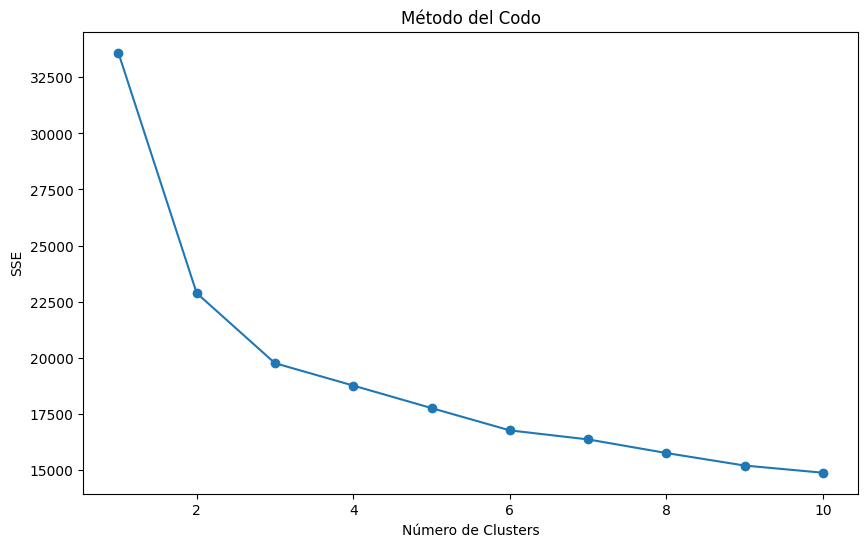

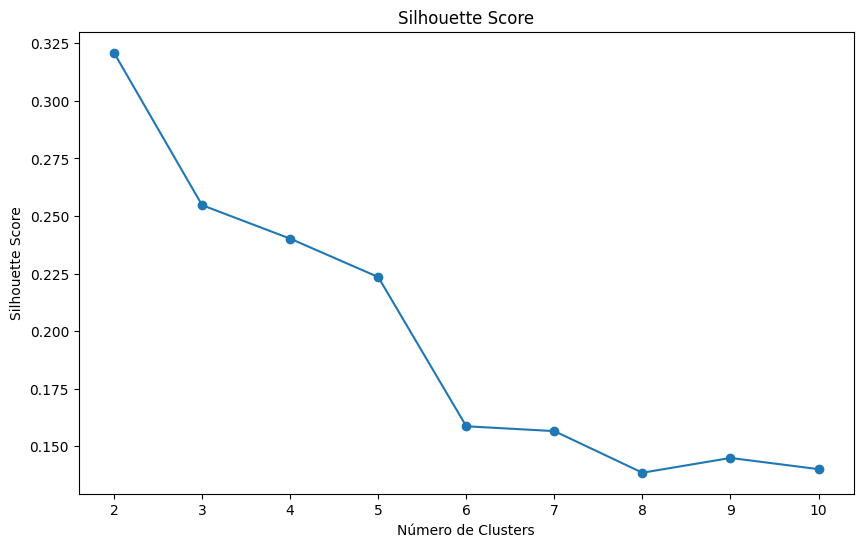

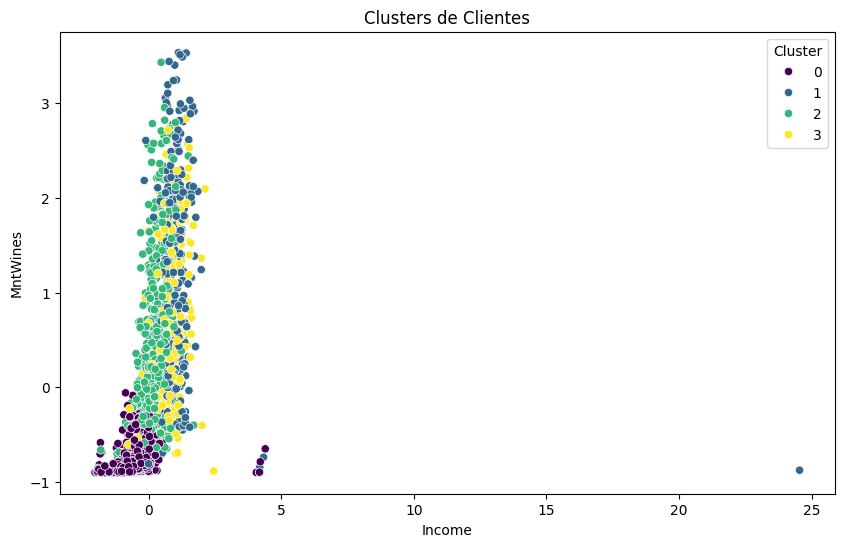

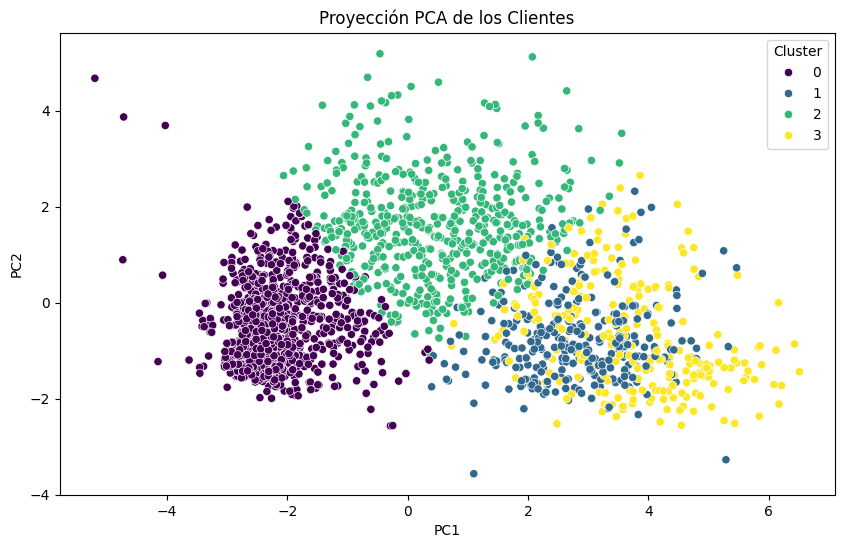

In [199]:
# K-means Clustering
# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# Determinar el número óptimo de clusters utilizando el método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_features])
    sse.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.show()

# Determinar el número óptimo de clusters utilizando el silhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_features])
    score = silhouette_score(df[numerical_features], kmeans.labels_)
    silhouette_scores.append(score)

# Visualizar el silhouette score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

# Agrupar a los clientes en diferentes clusters con el número óptimo de clusters (por ejemplo, 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_features])

# Análisis de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntWines', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters de Clientes')
plt.show()

# PCA para reducción de dimensionalidad
pca = PCA(n_components=0.9)  # Capturar al menos el 90% de la varianza explicada
pca_components = pca.fit_transform(df[numerical_features])

# Proyectar los datos en los primeros componentes principales
df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

# Visualizar los datos proyectados en los primeros dos componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=df['Cluster'], data=df_pca, palette='viridis')
plt.title('Proyección PCA de los Clientes')
plt.show()

# K-means
Determinacion del número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupacion de los clientes en diferentes clusters y analisis de cómo se dividen según sus características demográficas y de compra.

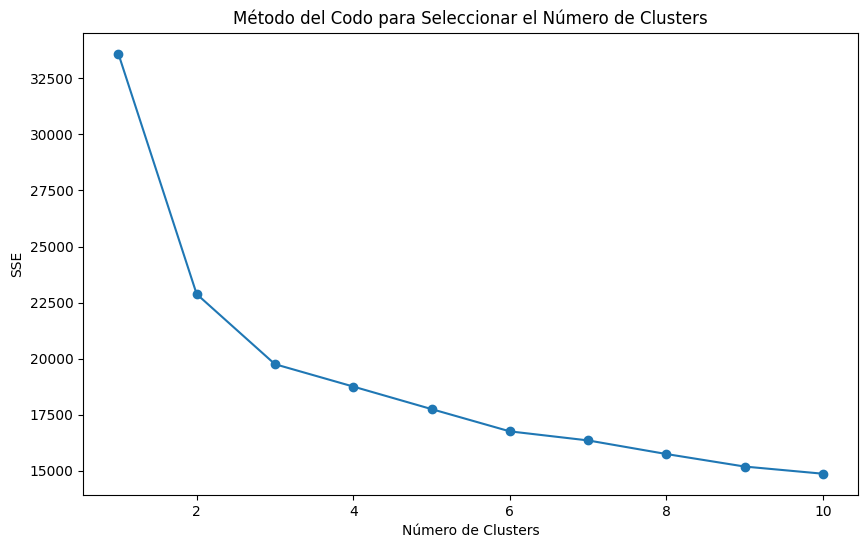

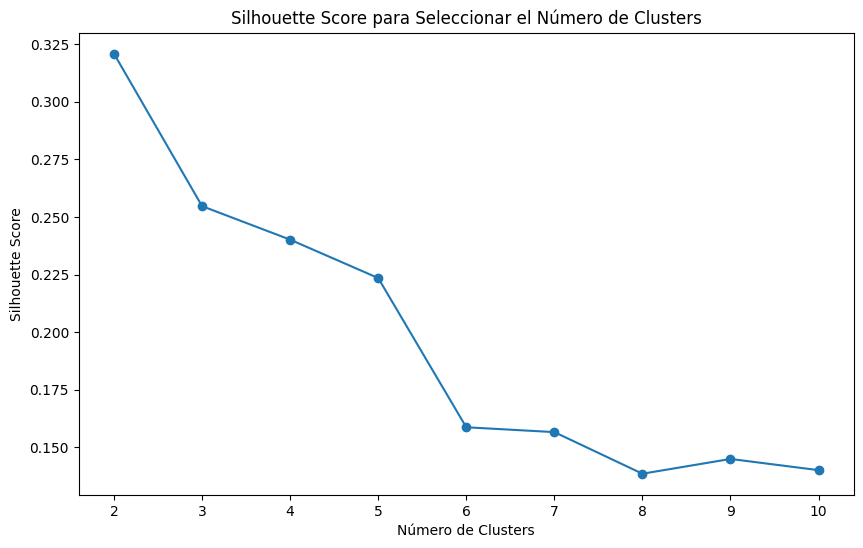

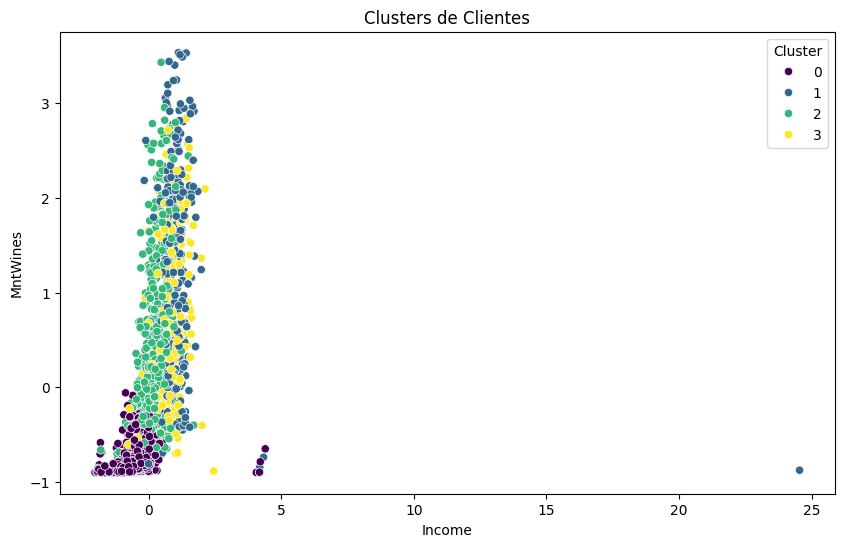

In [200]:
# Determinar el número óptimo de clusters utilizando el método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_features])
    sse.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para Seleccionar el Número de Clusters')
plt.show()

# Determinar el número óptimo de clusters utilizando el silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_features])
    score = silhouette_score(df[numerical_features], kmeans.labels_)
    silhouette_scores.append(score)

# Visualizar el silhouette score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Seleccionar el Número de Clusters')
plt.show()

# Agrupar a los clientes en diferentes clusters con el número óptimo de clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_features])

# Análisis de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntWines', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters de Clientes')
plt.show()

# PCA
Realizacio de una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyeccion de los datos en los primeros componentes principales y visualizacion de cómo se agrupan los clientes en el nuevo espacio de características.

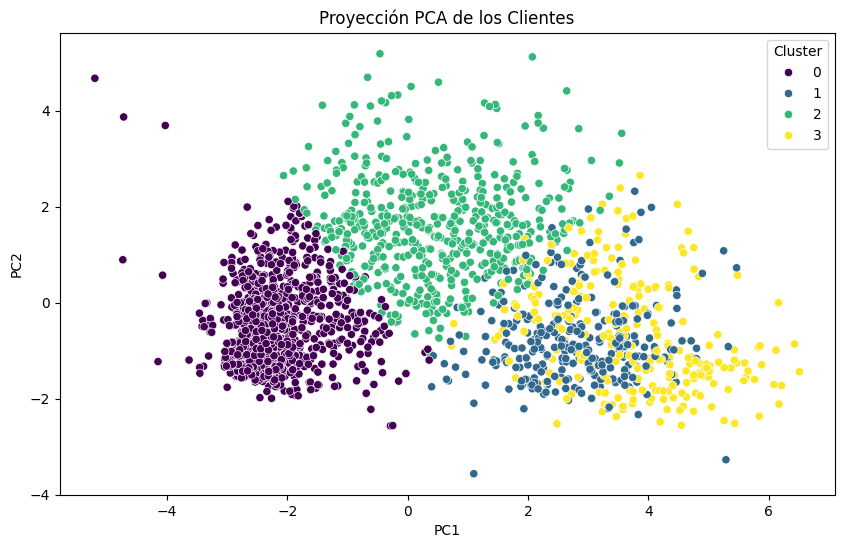

In [201]:
# PCA para reducción de dimensionalidad
pca = PCA(n_components=0.9)  # Capturar al menos el 90% de la varianza explicada
pca_components = pca.fit_transform(df[numerical_features])

# Proyectar los datos en los primeros componentes principales
df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

# Visualizar los datos proyectados en los primeros dos componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=df['Cluster'], data=df_pca, palette='viridis')
plt.title('Proyección PCA de los Clientes')
plt.show()

# Modelado con MLP
Implementacion de un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos. Se procede a dividir el dataset en conjuntos de entrenamiento y prueba.

Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       572
           1       0.53      0.40      0.45       100

    accuracy                           0.86       672
   macro avg       0.71      0.67      0.69       672
weighted avg       0.84      0.86      0.85       672

Confusion Matrix:
 [[536  36]
 [ 60  40]]


c:\Users\hp\anaconda3\envs\deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


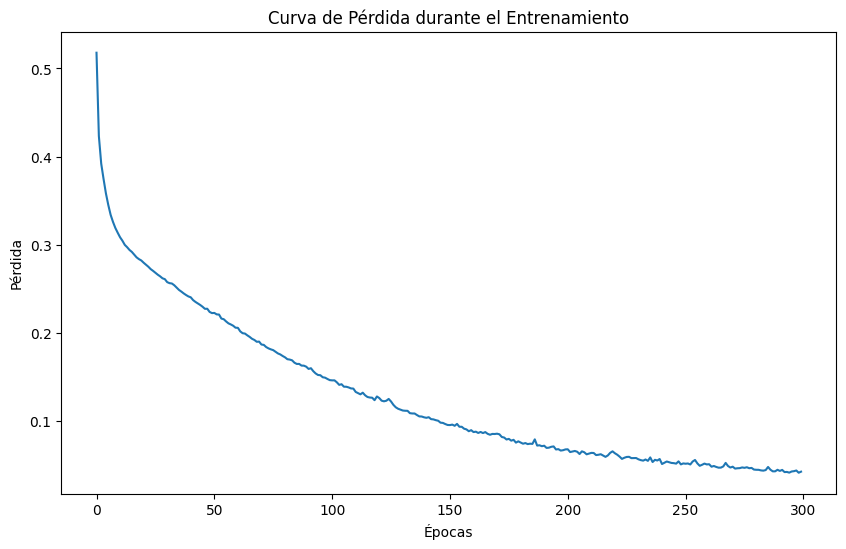

In [202]:
# Seleccionar las características y la variable objetivo
X = df[numerical_features]
y = df['Response']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Implementar el Perceptrón Multicapa (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=300, random_state=42)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

# Evaluación del Modelo
Evaluacion del modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Visualizacion de las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

Accuracy: 0.8571428571428571
Precision: 0.8438209618004743
Recall: 0.8571428571428571
F1 Score: 0.8488703077744174
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       572
           1       0.53      0.40      0.45       100

    accuracy                           0.86       672
   macro avg       0.71      0.67      0.69       672
weighted avg       0.84      0.86      0.85       672

Confusion Matrix:
 [[536  36]
 [ 60  40]]


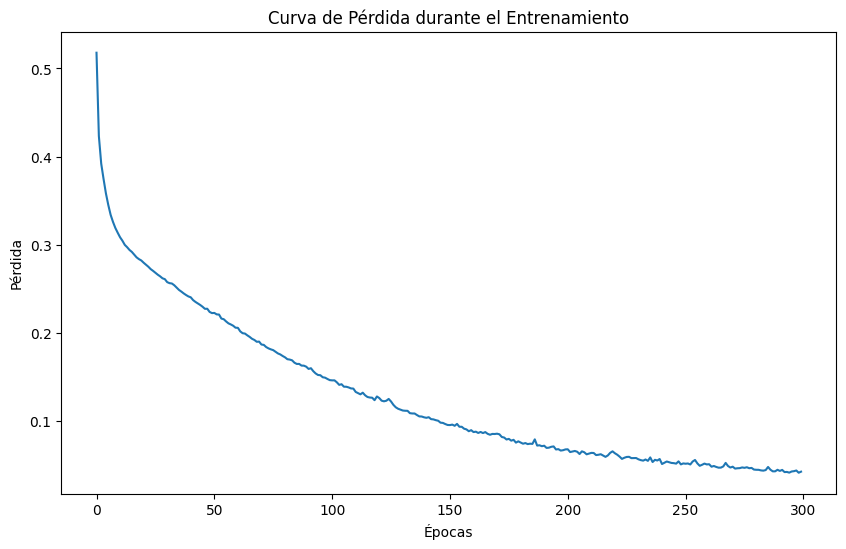

In [203]:
# Predecir en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

# Discusión y Análisis
Reflexion sobre los resultados del análisis no supervisado y el modelo MLP. Se discute el rendimiento del modelo MLP y cómo podrías mejorarlo.

Resumen de Clusters:
                   ID   Year_Birth    Income   Kidhome  Teenhome   Recency  \
Cluster                                                                     
0        5630.485963  1971.411423 -0.693900  0.656687 -0.115502  0.002374   
1        5744.956012  1967.351906  1.040246 -0.748945 -0.762910  0.063571   
2        5418.425424  1964.937288  0.222188 -0.378092  0.825989 -0.022040   
3        5631.322464  1969.119565  0.836897 -0.724252 -0.390825 -0.040314   

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
Cluster                                                         ...   
0       -0.781117  -0.539458        -0.639454        -0.556173  ...   
1        1.063290   0.301846         1.334018         0.671961  ...   
2        0.465056  -0.144039        -0.153013        -0.182939  ...   
3        0.615683   1.954036         1.072222         1.642470  ...   

         AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
Cluster

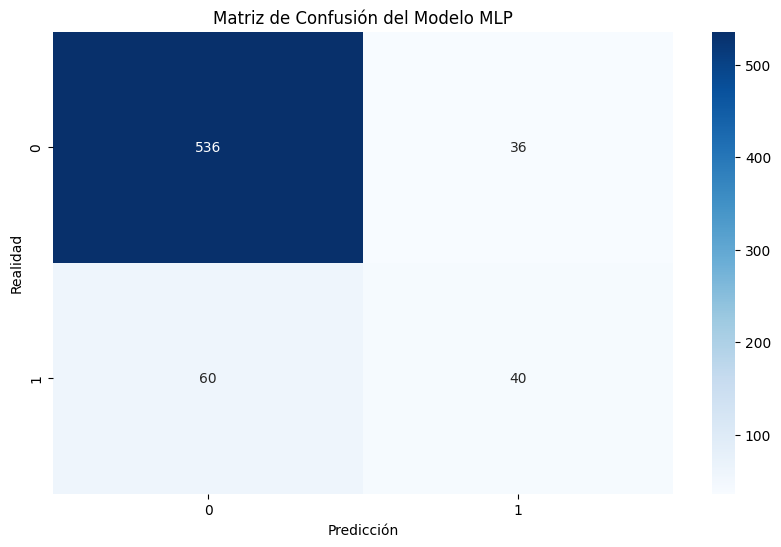

In [204]:
# Análisis de los clusters obtenidos con K-means
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()
print("Resumen de Clusters:\n", cluster_summary)

# Análisis de los componentes principales obtenidos con PCA
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada por cada Componente Principal:\n", explained_variance)
print("Varianza Total Explicada:", np.sum(explained_variance))

# Discusión del rendimiento del modelo MLP
print("Rendimiento del Modelo MLP:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Identificar posibles mejoras para el modelo MLP
# - Ajustar los hiperparámetros del MLP (número de capas, neuronas, funciones de activación, etc.)
# - Probar diferentes técnicas de regularización (dropout, L2 regularization)
# - Aumentar el número de épocas de entrenamiento
# - Realizar una mejor ingeniería de características

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión del Modelo MLP')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Reflexión final
# - Los clusters obtenidos con K-means muestran diferentes perfiles de clientes basados en sus características demográficas y de compra.
# - La reducción de dimensionalidad con PCA permite visualizar cómo se agrupan los clientes en un espacio de características reducido.
# - El modelo MLP muestra un rendimiento aceptable, pero hay margen para mejorar mediante ajustes en la arquitectura y el preprocesamiento de datos.

# Entrega Final
Entrega de un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones.

Preprocesamiento de datos:
     ID  Year_Birth   Marital_Status    Income   Kidhome  Teenhome  \
0  5524        1957  Single           0.235327 -0.825218 -0.929894   
1  2174        1954  Single          -0.235826  1.032559  0.906934   
2  4141        1965  Together         0.773633 -0.825218 -0.929894   
3  6182        1984  Together        -1.022732  1.032559 -0.929894   
4  5324        1981  Married          0.241519  1.032559 -0.929894   

    Dt_Customer   Recency  MntWines  MntFruits  ...  AcceptedCmp3  \
0  04-09-2012    0.307039  0.983781   1.551577  ...             0   
1  08-03-2014   -0.383664 -0.870479  -0.636301  ...             0   
2  21-08-2013   -0.798086  0.362723   0.570804  ...             0   
3  10-02-2014   -0.798086 -0.870479  -0.560857  ...             0   
4  19-01-2014    1.550305 -0.389085   0.419916  ...             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         

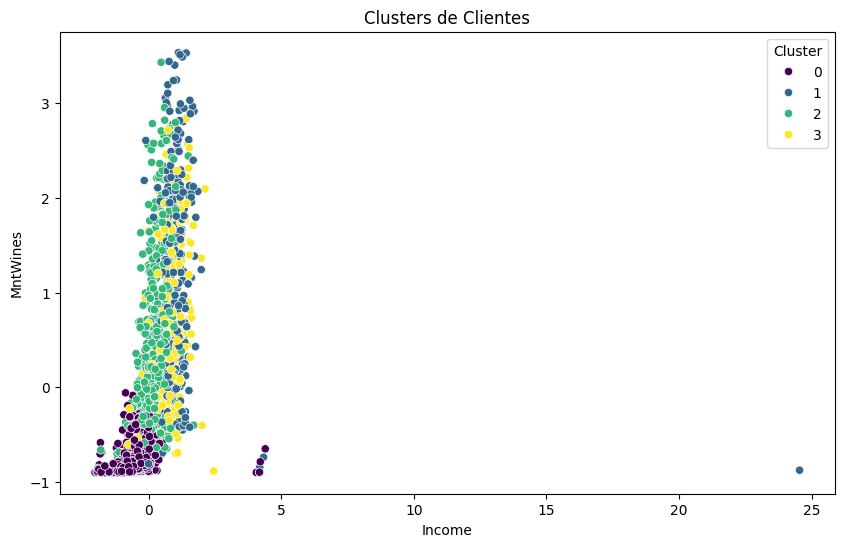

Proyección PCA de los Clientes:


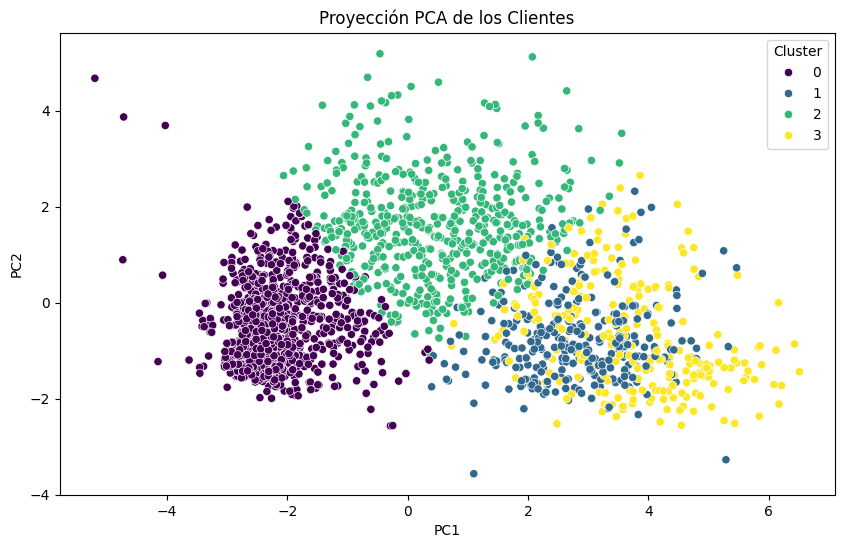


Modelado MLP:
Curva de Pérdida durante el Entrenamiento:


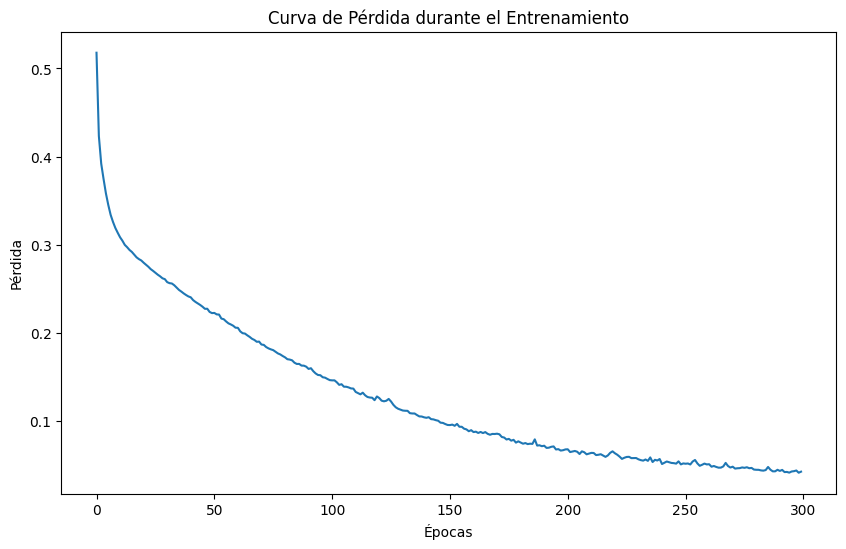


Evaluación del modelo:
Accuracy: 0.8571428571428571
Precision: 0.8438209618004743
Recall: 0.8571428571428571
F1 Score: 0.8488703077744174
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       572
           1       0.53      0.40      0.45       100

    accuracy                           0.86       672
   macro avg       0.71      0.67      0.69       672
weighted avg       0.84      0.86      0.85       672

Confusion Matrix:
 [[536  36]
 [ 60  40]]
Matriz de Confusión del Modelo MLP:


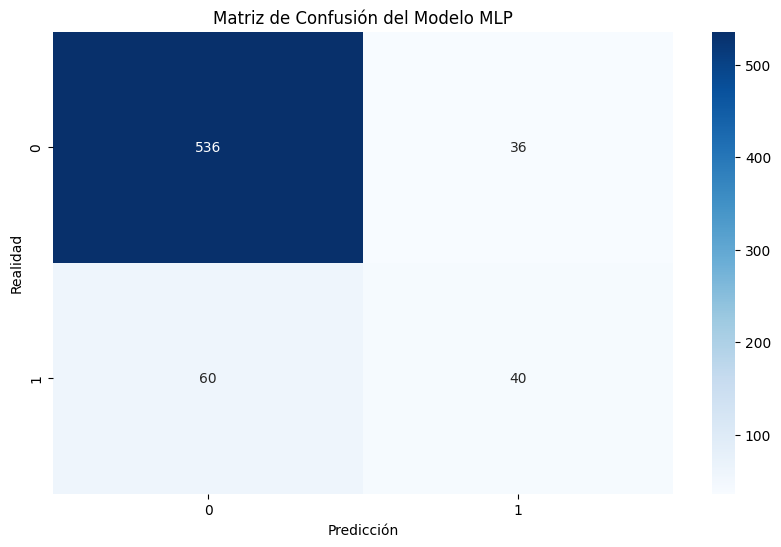


Discusión y análisis:
Resumen de Clusters:
                   ID   Year_Birth    Income   Kidhome  Teenhome   Recency  \
Cluster                                                                     
0        5630.485963  1971.411423 -0.693900  0.656687 -0.115502  0.002374   
1        5744.956012  1967.351906  1.040246 -0.748945 -0.762910  0.063571   
2        5418.425424  1964.937288  0.222188 -0.378092  0.825989 -0.022040   
3        5631.322464  1969.119565  0.836897 -0.724252 -0.390825 -0.040314   

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
Cluster                                                         ...   
0       -0.781117  -0.539458        -0.639454        -0.556173  ...   
1        1.063290   0.301846         1.334018         0.671961  ...   
2        0.465056  -0.144039        -0.153013        -0.182939  ...   
3        0.615683   1.954036         1.072222         1.642470  ...   

         AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  

In [205]:
# Preprocesamiento de datos
print("Preprocesamiento de datos:")
print(df.head())

# Análisis no supervisado
print("\nAnálisis no supervisado:")
print("Clusters de Clientes:")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntWines', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters de Clientes')
plt.show()

print("Proyección PCA de los Clientes:")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=df['Cluster'], data=df_pca, palette='viridis')
plt.title('Proyección PCA de los Clientes')
plt.show()

# Modelado MLP
print("\nModelado MLP:")
print("Curva de Pérdida durante el Entrenamiento:")
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

# Evaluación del modelo
print("\nEvaluación del modelo:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Matriz de Confusión del Modelo MLP:")
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión del Modelo MLP')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Discusión y análisis
print("\nDiscusión y análisis:")
print("Resumen de Clusters:\n", cluster_summary)
print("Varianza Explicada por cada Componente Principal:\n", explained_variance)
print("Varianza Total Explicada:", np.sum(explained_variance))

print("Rendimiento del Modelo MLP:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Reflexión final
print("\nReflexión final:")
print("- Los clusters obtenidos con K-means muestran diferentes perfiles de clientes basados en sus características demográficas y de compra.")
print("- La reducción de dimensionalidad con PCA permite visualizar cómo se agrupan los clientes en un espacio de características reducido.")
print("- El modelo MLP muestra un rendimiento aceptable, pero hay margen para mejorar mediante ajustes en la arquitectura y el preprocesamiento de datos.")